### Measures of Central Tendency

#### Arithmetic mean

In [58]:
# Two useful statistical libraries
import scipy.stats as stats
import numpy as np
import yfinance as yf
import seaborn as sns

sns.set_theme()

# We'll use these two data sets as examples
x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

print('Mean of x1:', sum(x1), '/', len(x1), '=', np.mean(x1))
print('Mean of x2:', sum(x2), '/', len(x2), '=', np.mean(x2))

Mean of x1: 29 / 8 = 3.625
Mean of x2: 129 / 9 = 14.333333333333334


We can also define a weighted arithmetic mean, which is useful for explicitly specifying the number of times each observation should be counted. For instance, in computing the average value of a portfolio, it is more convenient to say that 70% of your stocks are of type X rather than making a list of every share you hold.
The weighted arithmetic mean is defined as $\sum_{i=1}^n w_i X_i$ 

#### Median

The median of a set of data is the number which appears in the middle of the list when it is sorted in increasing or decreasing order. When we have an odd number n of data points, this is simply the value in position (n + 1) / 2. When we have an even number of data points, the list splits in half and there is no item in the middle; so we define the median as the average of the values in positions n/2 and (n/2) + 1

In [2]:
print('Median of x1:', np.median(x1))
print('Median of x2:', np.median(x2))

Median of x1: 3.5
Median of x2: 4.0


#### Mode

The mode is the most occuring value in a data set. It can be applied to non-numerical data, unlike the mean and the median. One situation in which it is useful is for data whose possible values are independent. For example, in the outcomes of a weighted die, coming up 6 often does not mean it is likely to come up 5; so knowing that the data set has a mode of 6 is more useful than knowing it has a mean of 4.5.

In [3]:
print('One mode of x1:', stats.mode(x1)[0])

def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
    
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (k, v) in counts.items():
        if v > maxcount:
            maxcount = v
            modes = {k}
        elif v == maxcount:
            modes.add(k)
    
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

print('All of the modes of x1:', mode(x1))
        


One mode of x1: 2
All of the modes of x1: [2, 5]


In [4]:
# Get return data for an asset and compute the mode of the data set
start = '2014-01-01'
end = '2015-01-01'
pricing = yf.Ticker('^GSPC').history(start=start, end=end)['Close']
returns = pricing.pct_change()[1:]
print("Mode of returns:", mode(returns))

# Since all the returns are distinct, we use a frequency distribution to get an alternative mode.
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)

# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print("Mode of bins:", [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of returns: No mode
Mode of bins: [(-0.0017507137682292555, 0.0005916424597657843)]


### Geometric mean

The geometric mean averages using multiplication.

$G = \sqrt[n]{X_1X_1\ldots X_n}$

In [5]:
# Use the scipy's gmean function to compute the geometric mean.
print("Geometric mean of x1:", stats.gmean(x1))
print("Geometric mean of x2:", stats.gmean(x2))

Geometric mean of x1: 3.0941040249774403
Geometric mean of x2: 4.552534587620071


What if we want to compute geometric mean when we have negative values? This problem is easy to solve in the case of asset returns, where our observations are always at least -1. We can add 1 to a return $R_t$ to get $1+R_t$, which is the ratio of the price of the asset for two consecutive periods (as opposed to the percent change between the prices, $R_t$). This quantity will always be nonnegative. So we can compute the geometric mean return.

In [6]:
# Add 1 to every value in the returns array and then compute R_G
ratios = returns + np.ones(len(returns))
R_G = stats.gmean(ratios) - 1
print("Geometric mean of returns:", R_G)

Geometric mean of returns: 0.0004653451863809721


The geometric mean is defined so that if the rate of return over the whole time period were constant and equal to $R_G$, the final price of the security would be the same as in the case of returns $R_1,...,R_T$

In [7]:
T = len(returns)
init_price = pricing.iloc[0]
final_price = pricing.iloc[T]
print("Initial price:", init_price)
print("Final price:", final_price)
print("Final price as computed with R_G:", init_price * (1 + R_G) ** T)

Initial price: 1831.97998046875
Final price: 2058.89990234375
Final price as computed with R_G: 2058.899902343742


### Harmonic mean

The harmonic mean is defined as:

$H = \frac{n}{\sum_{i=1}^n \frac{1}{X_i}}$

The harmonic mean can be expressed as the reciprocal of the arithmetic mean of the reciprocals of the given set of observations.

In [8]:
print("Harmonic mean of x1:", stats.hmean(x1))
print("Harmonic mean of x2:", stats.hmean(x2))

Harmonic mean of x1: 2.5590251332825593
Harmonic mean of x2: 2.869723656240511


The harmonic mean can be used when the data can be naturally phrased in terms of ratios. For instance, in the dollar-cost averaging strategy, a fixed amount is spent on shares of a stock at regular intervals. The higher the price of the stock, then, the fewer shares an investor following this strategy buys. The average amount they pay for the stock is the harmonic mean of the prices.

### Exercises

In [1]:
# Useful Functions
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

In [4]:
l=[]
for x in range(1,100):
    x=np.random.randint(1,100)
    l.append(x)

In [8]:
# Find the arithmetic mean of the dataset l
mean_ar = np.mean(l)
print(mean_ar)

45.74747474747475


In [18]:
# Find the mean of the returns of ticker "ITI"
price = yf.download('ITI', start='2005-01-01', end='2010-01-01')['Adj Close']
returns = price.pct_change()[1:]
print(np.mean(returns))

[*********************100%%**********************]  1 of 1 completed

-4.482282705837242e-05


In [20]:
# Find the median of the dataset l
mediana = np.median(l)
print(mediana)

46.0


In [21]:
# Find the median of the returns of ticker "BAC"
price = yf.download('BAC', start='2005-01-01', end='2010-01-01')['Adj Close']
returns = price.pct_change()[1:]
print(np.median(returns))

[*********************100%%**********************]  1 of 1 completed

-0.0001925654759847295


In [40]:
# Find the mode of l
mode(l)

[18, 10, 4, 50]

In [45]:
# Find the mode associated with the returns of "GS"
start = '2014-01-01'
end = '2015-01-01'
pricing = yf.download('GS', start=start, end=end)['Adj Close']
returns = pricing.pct_change()[1:]
hist, bins = np.histogram(returns, 20)
maxfreq = max(hist)

print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

[*********************100%%**********************]  1 of 1 completed

Mode of bins: [(-0.003038509072471496, 0.00017815692522751836), (0.00017815692522751836, 0.0033948229229265325)]


In [27]:
# Find the geometric mean of l
stats.gmean(l)

31.178028505498766

In [47]:
# Find the Geometric mean of the price of Citi Bank "C" for the last 5 years
pricing = yf.download('C', start='2005-01-01', end='2010-01-01')['Adj Close']

print(stats.gmean(pricing))

[*********************100%%**********************]  1 of 1 completed

169.4736591131677


In [35]:
# Find the harmonic mean of l
stats.hmean(l)

13.975663159714687

In [39]:
# Find the Harmonic Mean of the financial ETF (XLF) over the last 2 years
pricing = yf.download('XLF', start='2022-01-01', end='2024-01-01')['Adj Close']

stats.hmean(pricing)

[*********************100%%**********************]  1 of 1 completed


33.73216423901389

Skewness in a probability distribution is the measure of asymmetry. Negative skew has fewer low values and a longer left tail, whereas positive skew has fewer high values and a longer right tail. In asset pricing, skewness is an important information, naimly in risk assessment. Knowledge that the market has a 60% chance of going down and a 40% chance of going up apears helpfull but only if we know the market is obeying a normal distrubtuion. If we are told that the market will go up 2% but down 18%, we can see how skewness would give us better information.

Determine if the returns of SPY from 2016 to 2017 is positivly or negativly skewed.

In [60]:
import matplotlib.pyplot as plt
price = yf.download('^GSPC', start='2016-01-01', end='2017-01-01')['Volume']
returns = price.pct_change()[1:]

# Calculate Mean, Median and Mode
mean = np.mean(returns)
median = np.median(returns)
mode = stats.mode(returns)[0]

print("mean:", mean)
print("median:", median)
print("mode:", mode)

if mode < median < mean:
    print("The returns are positively skewed.")
if mean < median < mode:
    print("The returns are negatively skewed.")
if mean == median == mode:
    print("There is no Skewness: the returns are symmetrically distributed")

[*********************100%%**********************]  1 of 1 completed

mean: 0.012793461998054133
median: -0.010358505277369368
mode: -0.5366492682427592
The returns are positively skewed.


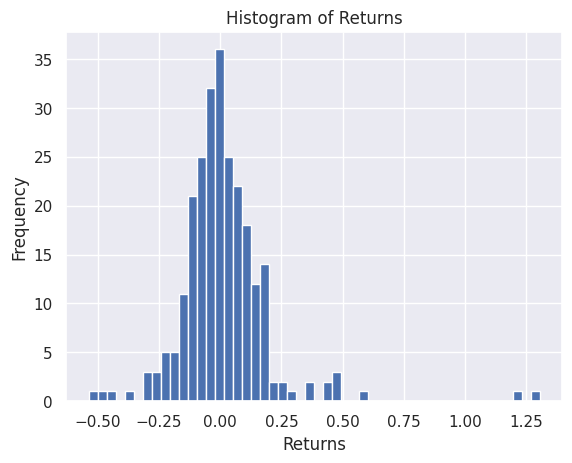

In [61]:
plt.hist(returns, bins = 50);
plt.xlabel('Returns');
plt.ylabel('Frequency');
plt.title('Histogram of Returns');